In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('USCorporateDefault.csv')
df = df.dropna()
print(df.shape)
print(list(df.columns))

(4000, 8)
['Firm ID', 'Year', 'Default', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']


In [3]:
df.head()

,Firm ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,3723,2012,1,0.24,0.06,0.03,1.83,0.27
1,1252,2014,0,0.42,-0.06,0.00,1.28,0.18
2,2188,2020,0,0.34,0.28,0.04,0.27,0.26
3,514,2014,0,0.09,0.20,0.05,0.94,0.14
4,3489,2014,0,0.19,-0.11,0.01,0.85,0.08


In [4]:
df.drop(['Firm ID','Year'], axis=1, inplace=True)

In [5]:
df['Default'].value_counts()

0    3549
1     451
Name: Default, dtype: int64

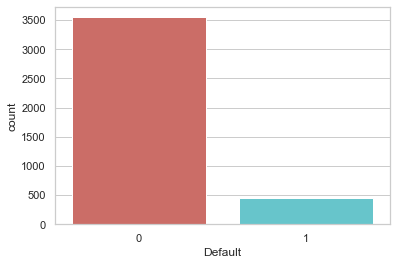

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='Default', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
count_no_default = len(df[df['Default']==0])
count_default = len(df[df['Default']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("percentage of default", pct_of_default*100)

percentage of no default is 88.725
percentage of default 11.275


In [8]:
df.groupby('Default').mean()

,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
Default,,,,,
0,0.215500,0.100138,0.025365,0.689276,0.208755
1,0.220443,-0.020710,0.034745,1.597406,0.201441


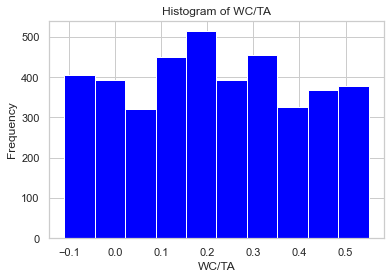

In [9]:
%matplotlib inline
df['WC/TA'].hist(color="blue")
plt.title('Histogram of WC/TA')
plt.xlabel('WC/TA')
plt.ylabel('Frequency')
plt.savefig('hist_WC_TA')

In [10]:
df['WC/TA'].describe()

count    4000.000000
mean        0.216057
std         0.186584
min        -0.110000
25%         0.060000
50%         0.210000
75%         0.370000
max         0.550000
Name: WC/TA, dtype: float64

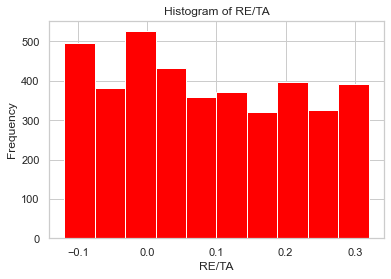

In [11]:
df['RE/TA'].hist(color="red")
plt.title('Histogram of RE/TA')
plt.xlabel('RE/TA')
plt.ylabel('Frequency')
plt.savefig('hist_RE_TA')

In [12]:
df['RE/TA'].describe()

count    4000.000000
mean        0.086512
std         0.129356
min        -0.120000
25%        -0.020000
50%         0.070000
75%         0.200000
max         0.320000
Name: RE/TA, dtype: float64

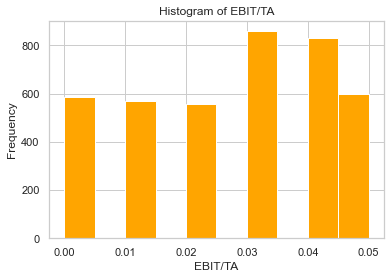

In [13]:
df['EBIT/TA'].hist(color="orange")
plt.title('Histogram of EBIT/TA')
plt.xlabel('EBIT/TA')
plt.ylabel('Frequency')
plt.savefig('hist_EBIT_TA')

In [14]:
df['EBIT/TA'].describe()

count    4000.000000
mean        0.026423
std         0.016462
min         0.000000
25%         0.010000
50%         0.030000
75%         0.040000
max         0.050000
Name: EBIT/TA, dtype: float64

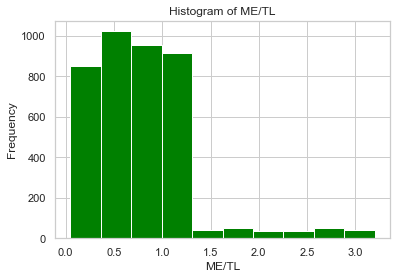

In [15]:
df['ME/TL'].hist(color="green")
plt.title('Histogram of ME/TL')
plt.xlabel('ME/TL')
plt.ylabel('Frequency')
plt.savefig('hist_ME_TL')

In [16]:
df['ME/TL'].describe()

count    4000.000000
mean        0.791668
std         0.533329
min         0.050000
25%         0.410000
50%         0.730000
75%         1.060000
max         3.200000
Name: ME/TL, dtype: float64

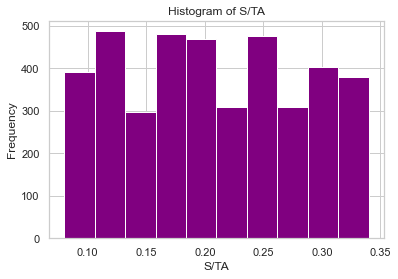

In [17]:
df['S/TA'].hist(color="purple")
plt.title('Histogram of S/TA')
plt.xlabel('S/TA')
plt.ylabel('Frequency')
plt.savefig('hist_S_TA')

In [18]:
df['S/TA'].describe()

count    4000.000000
mean        0.207930
std         0.075232
min         0.080000
25%         0.140000
50%         0.210000
75%         0.270000
max         0.340000
Name: S/TA, dtype: float64

In [19]:
X = df.loc[:, df.columns != 'Default']
y = df.loc[:, df.columns == 'Default']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no default in oversampled data",len(os_data_y[os_data_y['Default']==0]))
print("Number of default",len(os_data_y[os_data_y['Default']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['Default']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['Default']==1])/len(os_data_X))

length of oversampled data is  4756
Number of no default in oversampled data 2378
Number of default 2378
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [20]:
df_vars = df.columns.values.tolist()
y=['Default']
X=[i for i in df_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [21]:
cols=['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA'] 

X=os_data_X[cols]
y=os_data_y['Default']

In [22]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.397195
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.427    
Dependent Variable: Default          AIC:              3788.1176
Date:               2022-02-01 01:27 BIC:              3820.4534
No. Observations:   4756             Log-Likelihood:   -1889.1  
Df Model:           4                LL-Null:          -3296.6  
Df Residuals:       4751             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
WC/TA     -1.1173    0.2663   -4.1951  0.0000   -1.6393   -0.5953
RE/TA    -13.0087    0.5001  -26.0104  0.0000  -13.9889  -12.0284
EBIT/TA 

In [23]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.397195
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4756
Model:                          Logit   Df Residuals:                     4751
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Feb 2022   Pseudo R-squ.:                  0.4270
Time:                        01:27:09   Log-Likelihood:                -1889.1
converged:                       True   LL-Null:                       -3296.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WC/TA         -1.1173      0.266     -4.195      0.000      -1.639      -0.595
RE/TA        -13.0087      0.

In [24]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
logit=sm.Logit(y_train,X_train)
logit.fit()
print(logit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.395626
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395626
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 3186
Model:                          Logit   Df Residuals:                     3181
Method:                           MLE   Df Model:                            4
Date:                Tue, 01 Feb 2022   Pseudo R-squ.:                  0.4292
Time:                        01:27:09   Log-Likelihood:                -1260.5
converged:                       True   LL-Null:                       -2208.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WC/TA 

In [25]:
params = pd.DataFrame(logit.fit().params,columns={'coef'},)
params

Optimization terminated successfully.
         Current function value: 0.395626
         Iterations 7


,coef
WC/TA,-1.455245
RE/TA,-13.000206
EBIT/TA,35.380564
ME/TL,1.541403
S/TA,-9.435201


In [26]:
result1 = X_test
result1['y_pred'] = result1['WC/TA'] * params['coef'][0] + result1['RE/TA'] * params['coef'][1] + result1['EBIT/TA'] * params['coef'][2] + result1['ME/TL'] * params['coef'][3] + result1['S/TA'] * params['coef'][4]
result1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA,y_pred
3081,0.309643,-0.031707,0.040000,1.313452,0.246548,1.075145
2458,0.310000,-0.110000,0.040000,0.180000,0.260000,0.218419
1877,0.300000,-0.080000,0.030000,2.720000,0.210000,3.876083
3870,0.080000,0.016816,0.036136,2.636816,0.179320,3.315956
2523,0.170000,-0.060000,0.030000,0.390000,0.260000,-0.257968
...,...,...,...,...,...,...
2599,0.180000,0.180000,0.040000,0.810000,0.080000,-0.693038
4634,0.135899,-0.029342,0.033443,0.726228,0.236557,0.254363
4501,0.330353,0.040000,0.040000,0.613929,0.129824,0.135870
2760,0.216179,0.053090,0.030000,0.513455,0.178007,-0.831441


In [27]:
result1['y_pred_Logit'] = 1 / (1 + np.exp(-result1['y_pred']))
result1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA,y_pred,y_pred_Logit
3081,0.309643,-0.031707,0.040000,1.313452,0.246548,1.075145,0.745574
2458,0.310000,-0.110000,0.040000,0.180000,0.260000,0.218419,0.554389
1877,0.300000,-0.080000,0.030000,2.720000,0.210000,3.876083,0.979689
3870,0.080000,0.016816,0.036136,2.636816,0.179320,3.315956,0.964972
2523,0.170000,-0.060000,0.030000,0.390000,0.260000,-0.257968,0.435863
...,...,...,...,...,...,...,...
2599,0.180000,0.180000,0.040000,0.810000,0.080000,-0.693038,0.333357
4634,0.135899,-0.029342,0.033443,0.726228,0.236557,0.254363,0.563250
4501,0.330353,0.040000,0.040000,0.613929,0.129824,0.135870,0.533915
2760,0.216179,0.053090,0.030000,0.513455,0.178007,-0.831441,0.303340


In [28]:
d = {'y_pred_proba': result1['y_pred_Logit']}
df23 = pd.DataFrame(data=d)
df23 = df23.reset_index()
df23.drop(['index'], axis=1, inplace=True)

df23['y_pred'] = 0.000
for i in range(0,len(df23['y_pred_proba'])):
    if df23['y_pred_proba'][i] > 0.500:
        df23['y_pred'][i] = 1.000
    else: 
        df23['y_pred'][i] = 0.000
        
y_pred = np.array(df23['y_pred'])
y_pred = y_pred.astype('int64')
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

print('Accuracy of Logit Model on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Logit Model on test set: 0.80


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[598 187]
 [120 665]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       785
           1       0.78      0.85      0.81       785

    accuracy                           0.80      1570
   macro avg       0.81      0.80      0.80      1570
weighted avg       0.81      0.80      0.80      1570



In [32]:
y_pred_proba = np.array(df23['y_pred_proba'])
y_pred_proba 

array([0.7455742 , 0.55438882, 0.97968921, ..., 0.5339154 , 0.30334048,
       0.14704532])

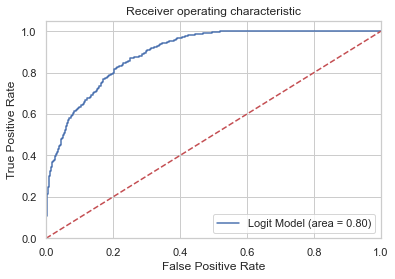

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='Logit Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Logit_ROC')
plt.show()